In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load data from steinmetz dir
alldat = np.load('../steinmetz/steinmetz_part1.npz', allow_pickle=True)['dat']
alldat = np.hstack((alldat, np.load('../steinmetz/steinmetz_part2.npz', allow_pickle=True)['dat']))
alldat = np.hstack((alldat, np.load('../steinmetz/steinmetz_part3.npz', allow_pickle=True)['dat']))

dat['mouse_name']: mouse name

dat['date_exp']: when a session was performed

dat['spks']: neurons by trials by time bins.

dat['brain_area']: brain area for each neuron recorded.

dat['contrast_right']: contrast level for the right stimulus, which is always contralateral to the recorded brain areas.

dat['contrast_left']: contrast level for left stimulus.

dat['gocue']: when the go cue sound was played.

dat['response_times']: when the response was registered, which has to be after the go cue. The mouse can turn the wheel before the go cue (and nearly always does!), but the stimulus on the screen won't move before the go cue.

dat['response']: which side the response was (-1, 0, 1). When the right-side stimulus had higher contrast, the correct choice was -1. 0 is a no go response.

dat['feedback_time']: when feedback was provided.

dat['feedback_type']: if the feedback was positive (+1, reward) or negative (-1, white noise burst).

dat['wheel']: exact position of the wheel that the mice uses to make a response, binned at 10ms.

dat['pupil']: pupil area (noisy, because pupil is very small) + pupil horizontal and vertical position.

dat['lfp']: recording of the local field potential in each brain area from this experiment, binned at 10ms.

dat['brain_area_lfp']: brain area names for the LFP channels.

dat['trough_to_peak']: measures the width of the action potential waveform for each neuron. Widths <=10 samples are "putative fast spiking neurons".

dat['waveform_w']: temporal components of spike waveforms. w@u reconstructs the time by channels action potential shape.

dat['waveform_u]: spatial components of spike waveforms.

dat['%X%_passive']: same as above for X = {spks, lfp, pupil, wheel, contrast_left, contrast_right} but for passive trials at the end of the recording when the mouse was no longer engaged and stopped making responses.

In [3]:
# select just one of the recordings here. 11 is nice because it has some neurons in vis ctx. 
dat = alldat[11]
for key in dat.keys(): print(key)

spks
wheel
pupil
lfp
response
response_time
bin_size
stim_onset
contrast_right
contrast_left
brain_area
brain_area_lfp
feedback_time
feedback_type
gocue
mouse_name
date_exp
trough_to_peak
waveform_w
waveform_u
active_trials
contrast_left_passive
contrast_right_passive
spks_passive
lfp_passive
pupil_passive
wheel_passive


In [4]:
# recorded brain regions
regions, count = np.unique(dat['brain_area'], return_counts=True)
print(f"total recordings: {dat['brain_area'].shape}")
print(list(zip(regions, count)))

total recordings: (698,)
[('ACA', 16), ('CA1', 50), ('DG', 65), ('LGd', 11), ('LH', 18), ('MD', 126), ('MOs', 6), ('PL', 56), ('SUB', 105), ('VISam', 79), ('VISp', 66), ('root', 100)]


In [8]:
# lets look at VISp neurons responses
visp_neurons = dat['brain_area'] == 'VISp'
visp_neurons_spks = dat['spks'][visp_neurons]
visp_neurons_count = visp_neurons_spks.shape[0]
total_neurons_count = dat['spks'].shape[0]
trials_count = dat['spks'].shape[1]
print(f"total neurons: {total_neurons_count}")
print(f"visp neurons: {visp_neurons_count}")
print(f"trials: {trials_count}")

total neurons: 698
visp neurons: 66
trials: 340


Text(0, 0.5, 'number of neurons')

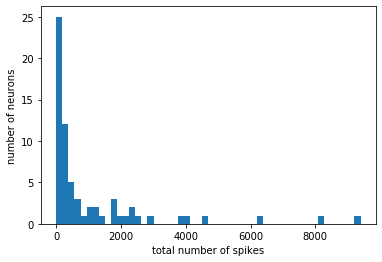

In [9]:
# get number of spikes for each neuron across trials
spks_per_trial = [np.sum(visp_neurons_spks[neuron]) for neuron in range(visp_neurons_count)]

plt.hist(spks_per_trial, bins=50);
plt.xlabel("total number of spikes")
plt.ylabel("number of neurons")

In [10]:
# get response time for each trial
# check
visp_neurons_responses = np.zeros_like(visp_neurons_spks)
response_time_bins = np.asarray(dat['response_time']*10).ravel().astype(np.int)
for neuron in range(visp_neurons_count):
    for trial in range(trials_count):
        visp_neurons_responses[neuron][trial][response_time_bins[trial]] = 1

In [11]:
# get gocue time for each trial
# check
visp_neurons_gocue = np.zeros_like(visp_neurons_spks)
gocue_time_bins = np.asarray(dat['gocue']*10).ravel().astype(np.int)
for neuron in range(visp_neurons_count):
    for trial in range(trials_count):
        visp_neurons_gocue[neuron][trial][gocue_time_bins[trial]] = 1

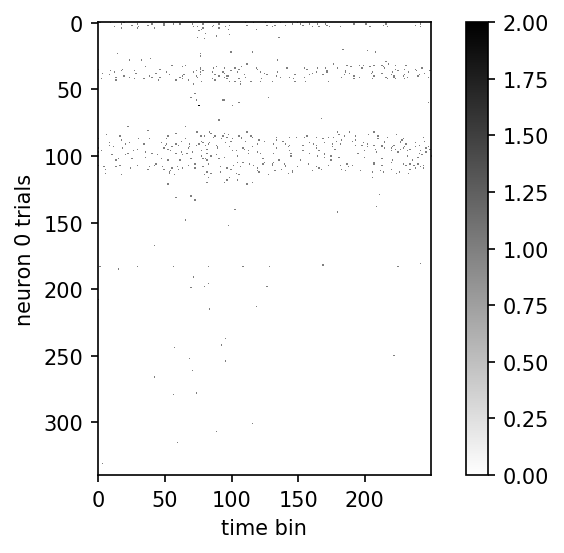

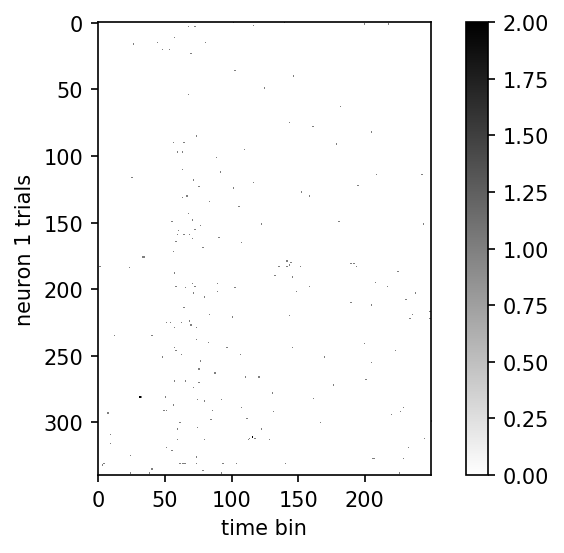

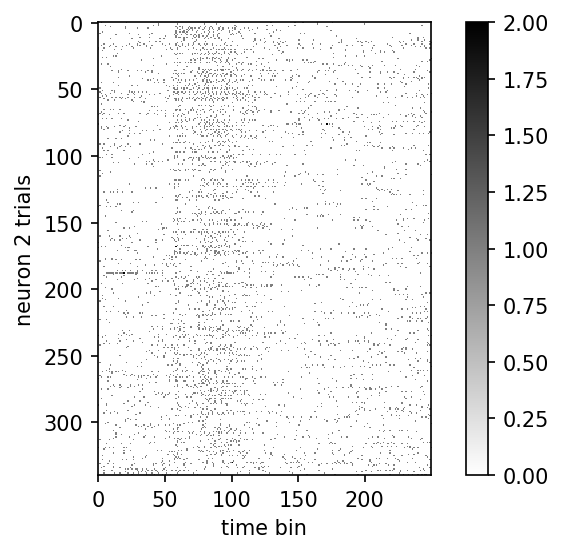

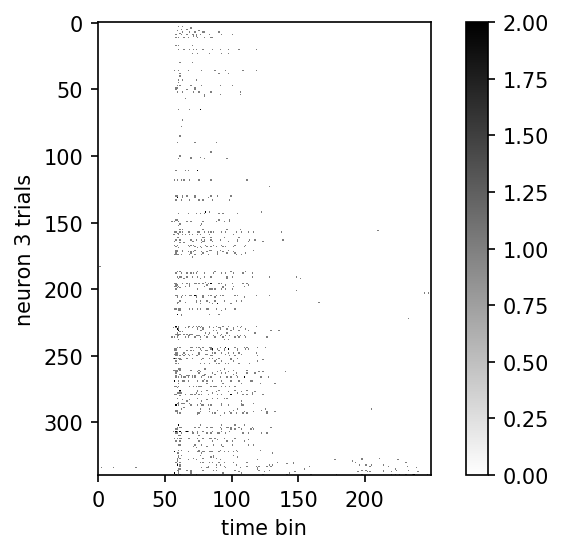

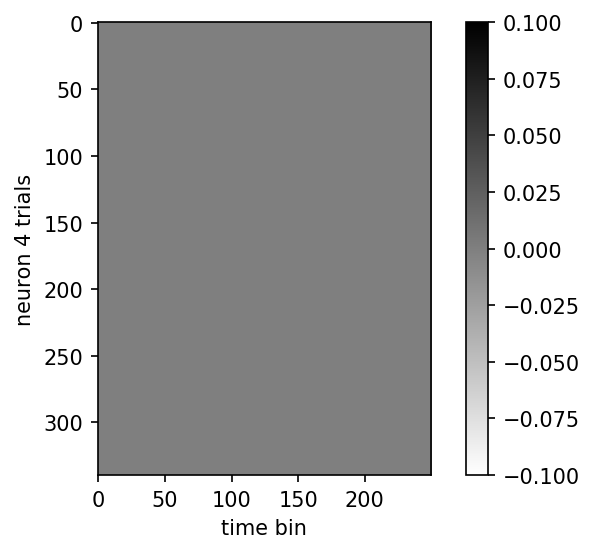

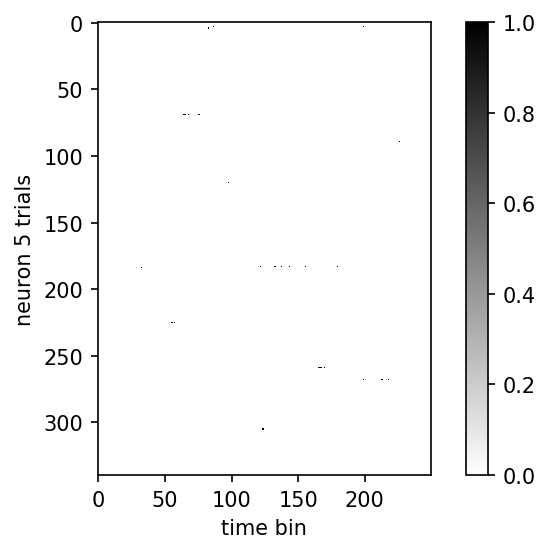

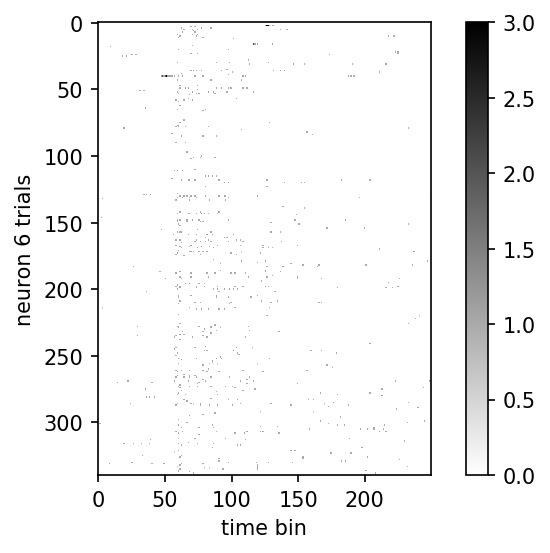

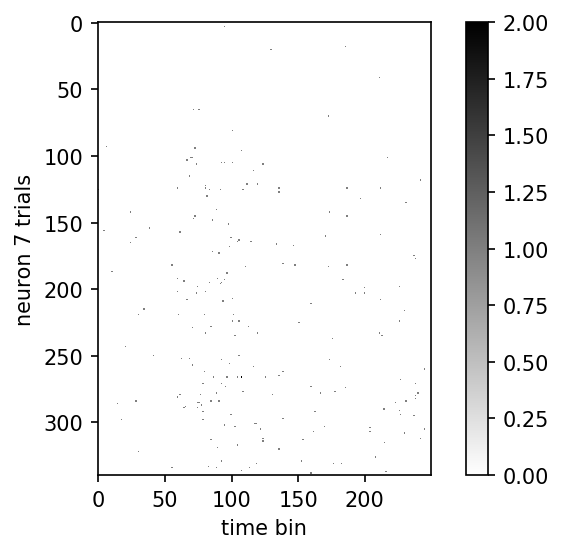

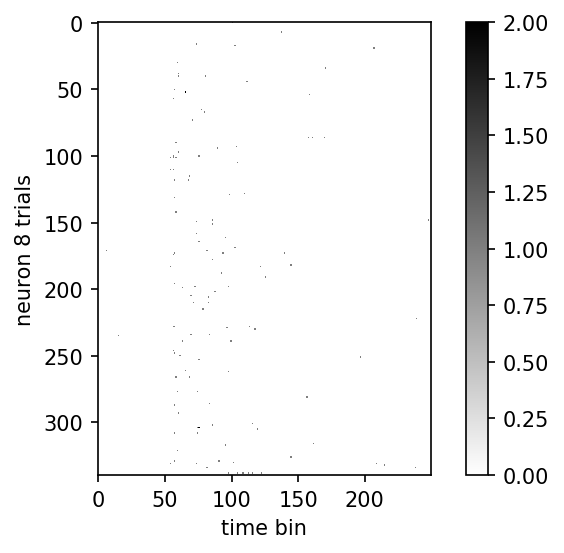

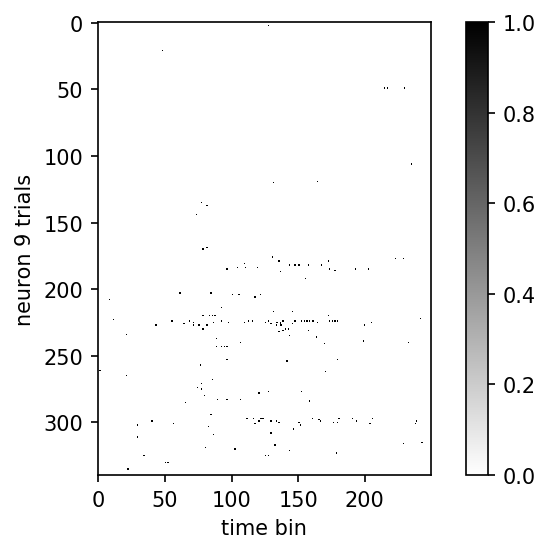

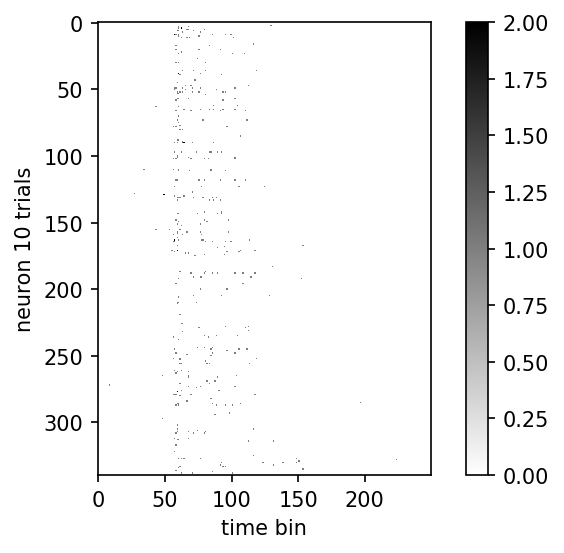

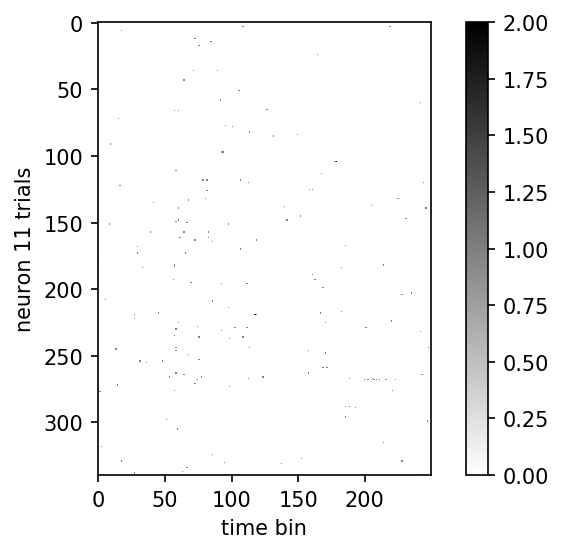

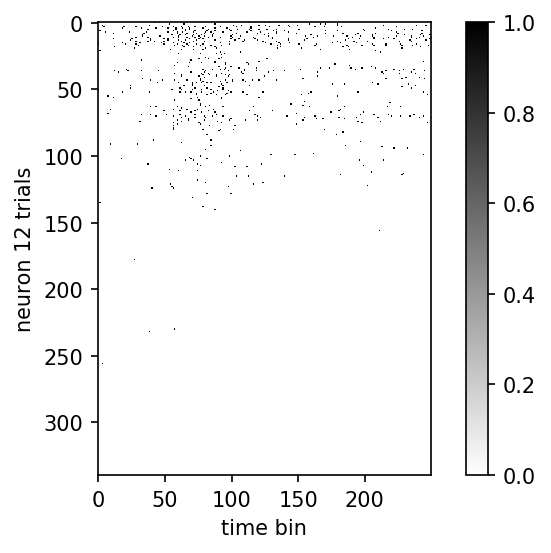

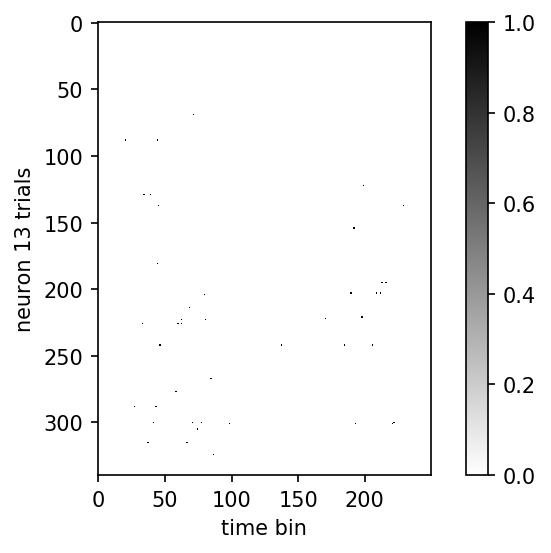

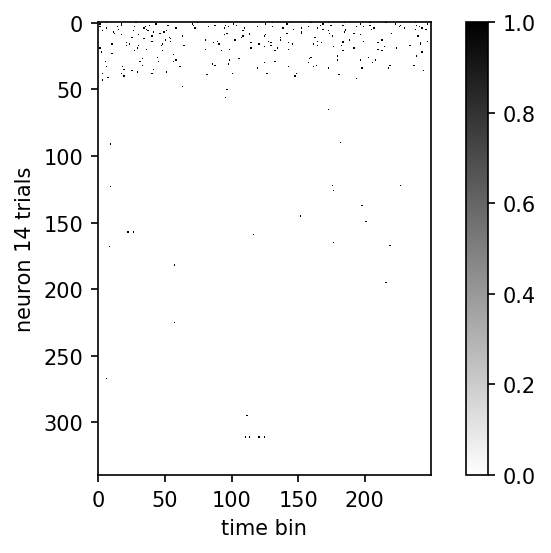

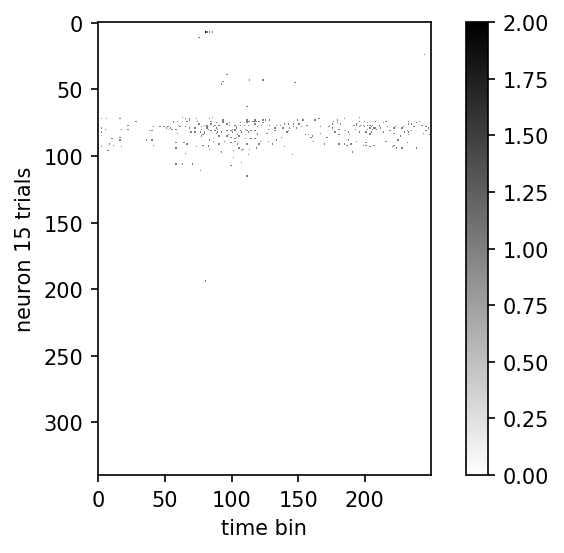

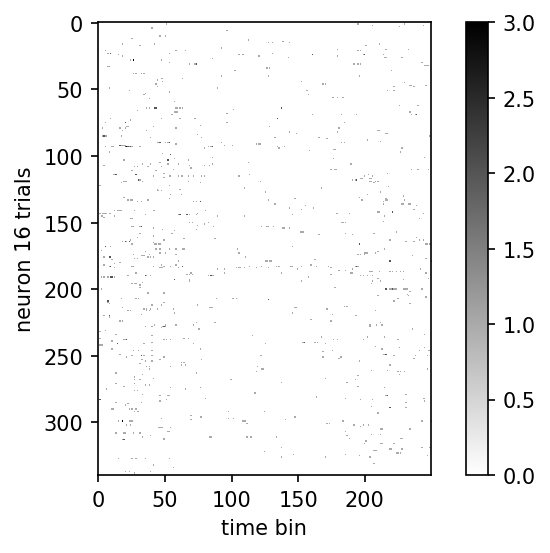

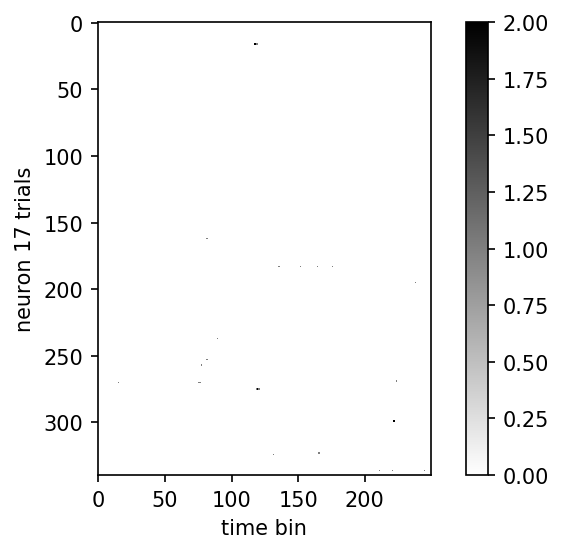

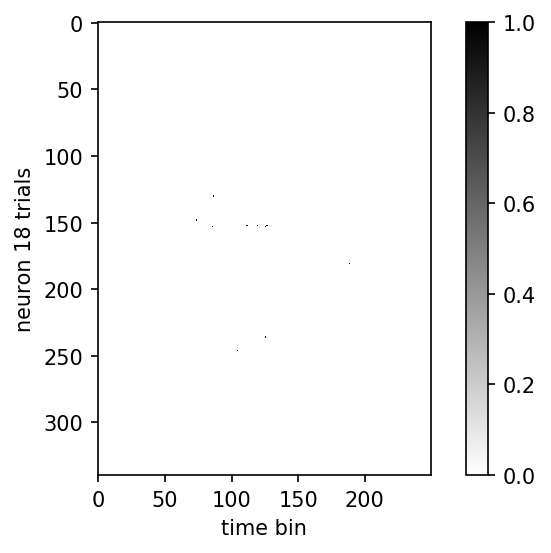

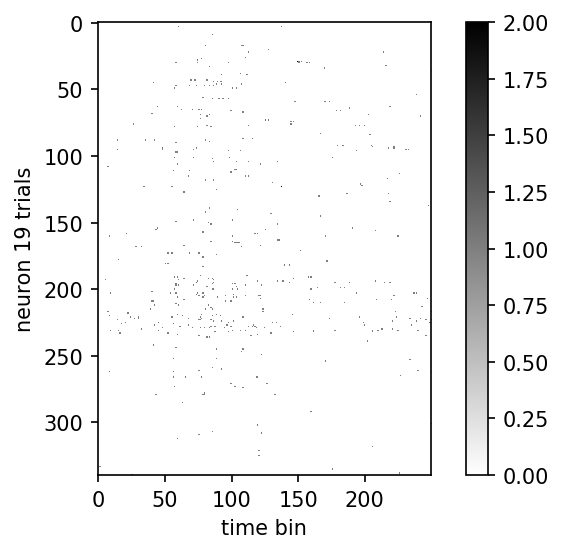

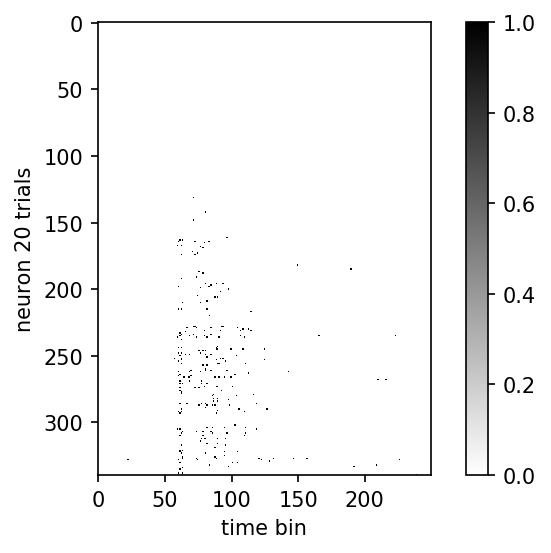

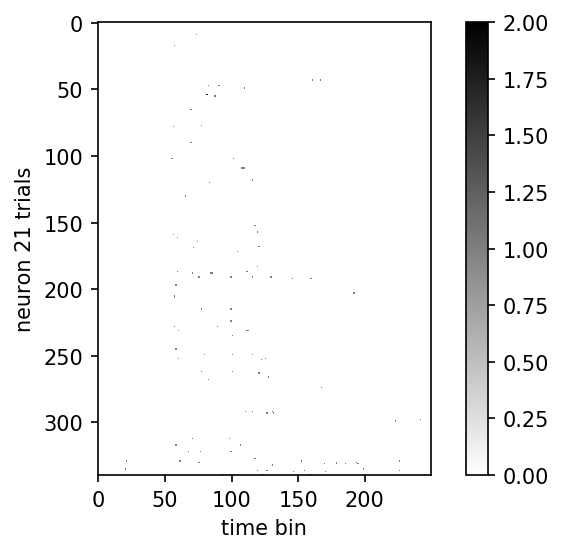

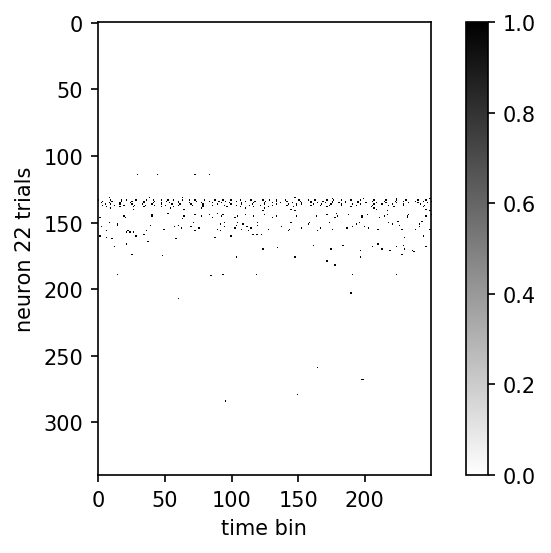

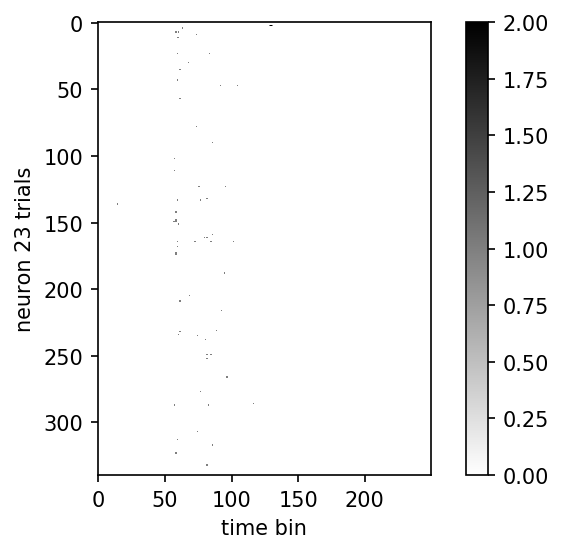

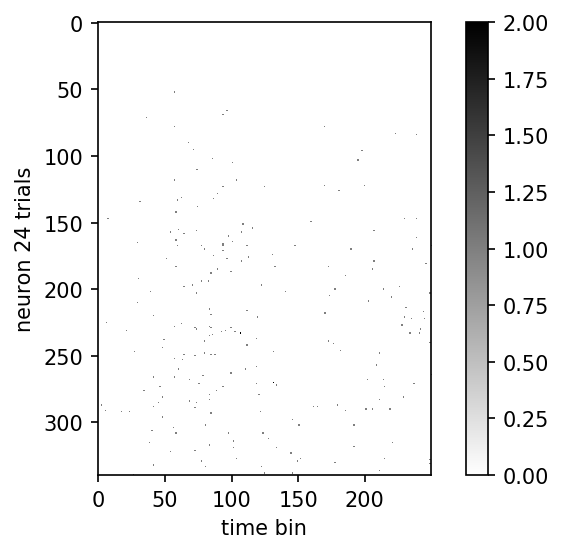

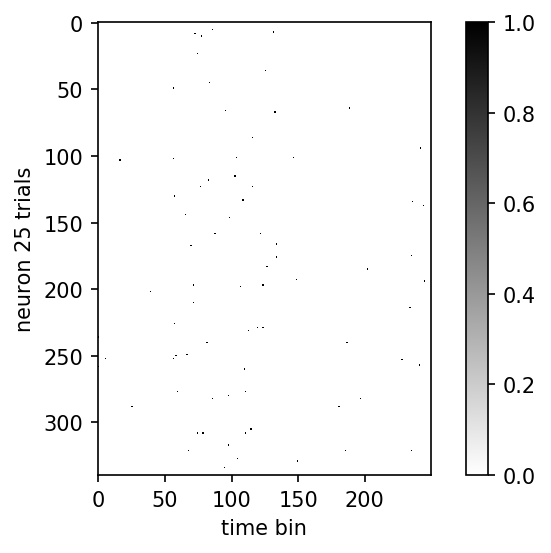

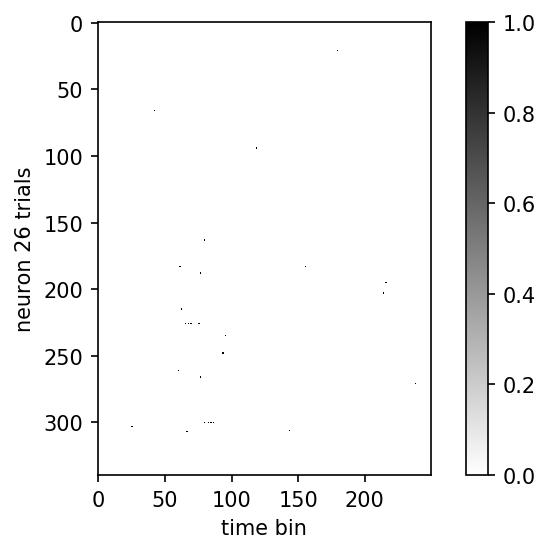

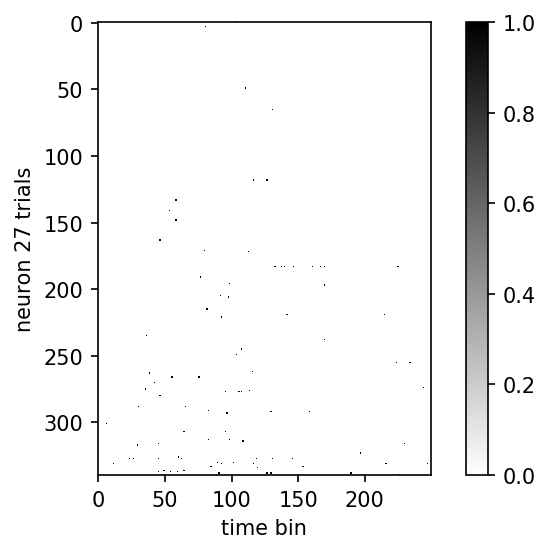

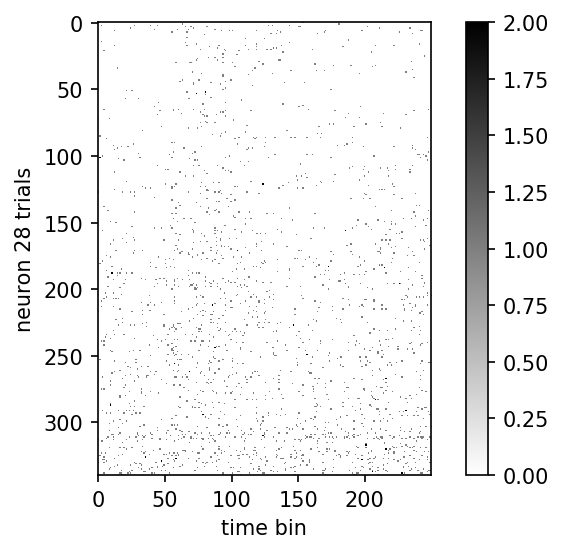

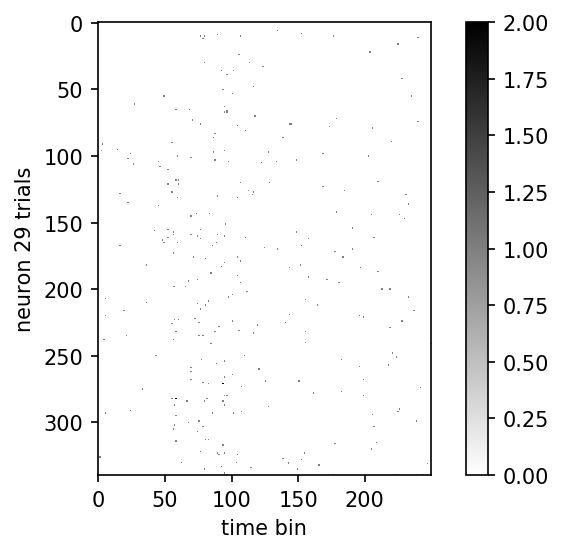

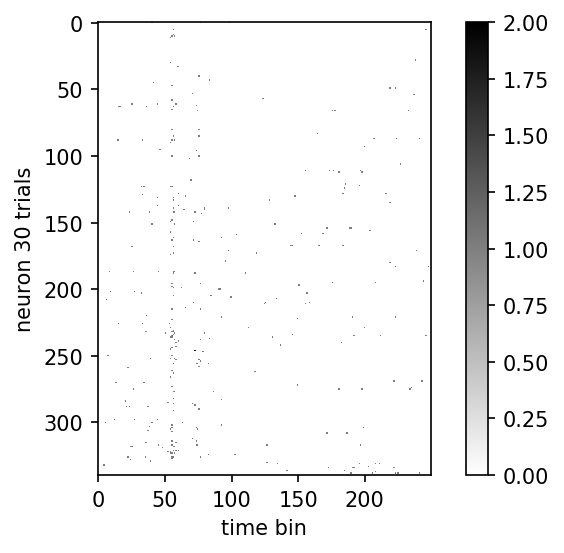

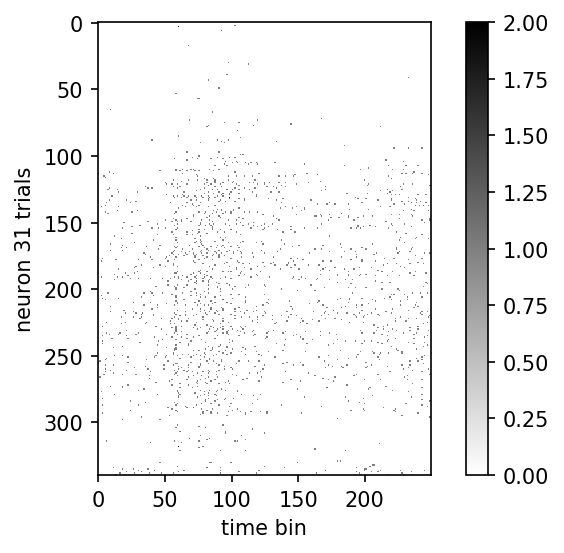

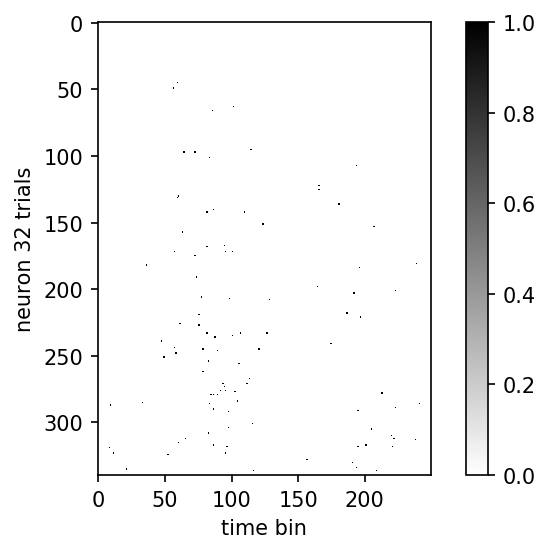

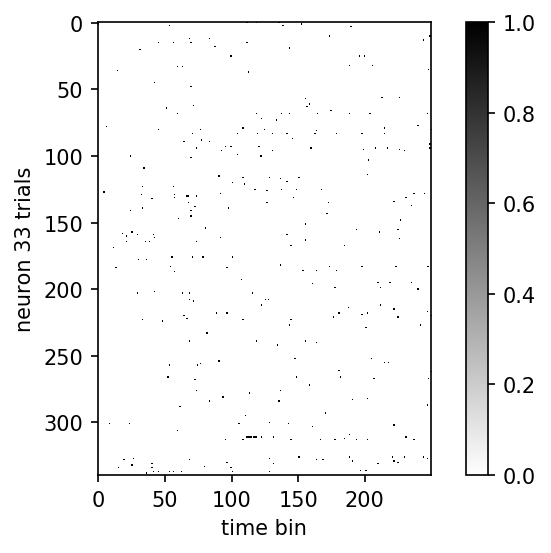

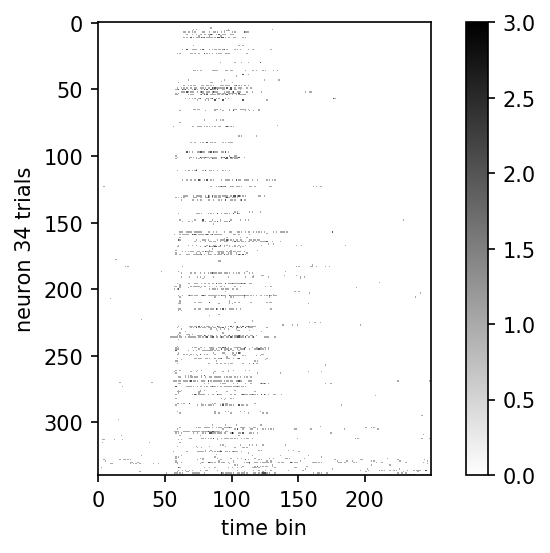

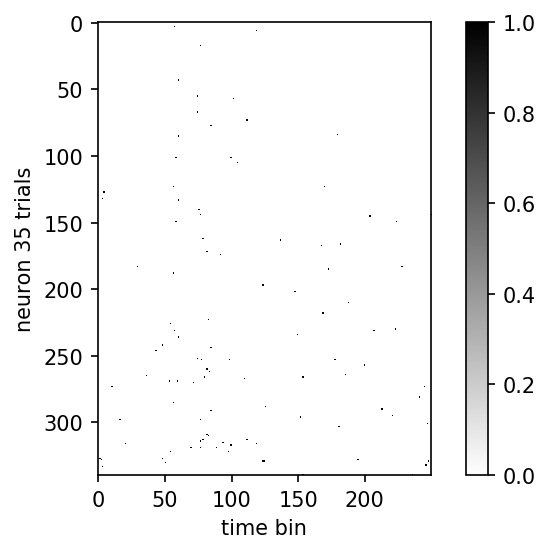

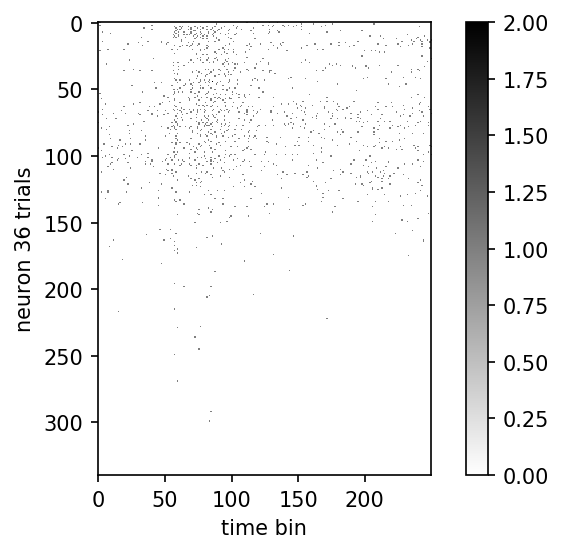

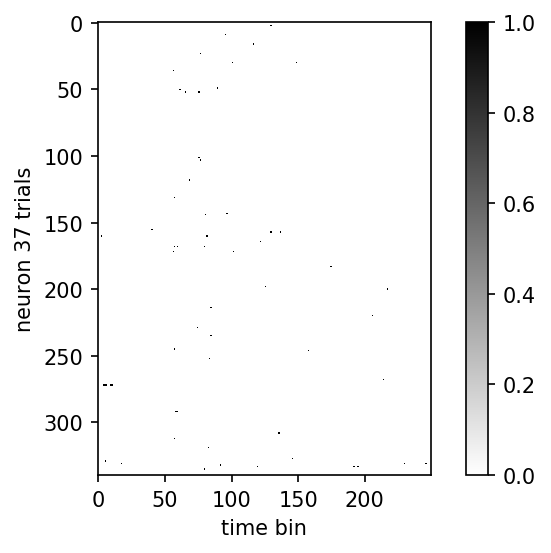

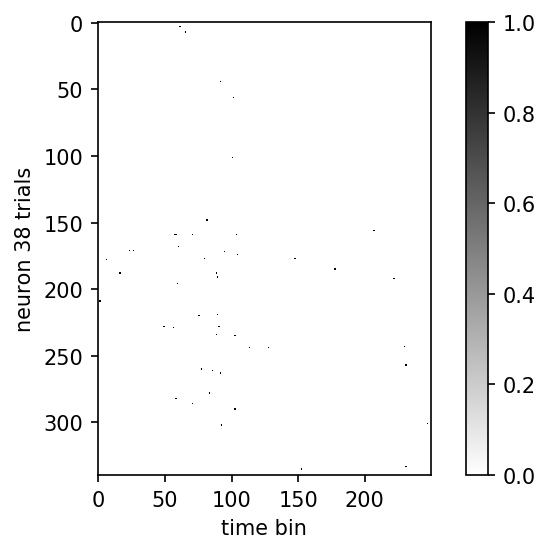

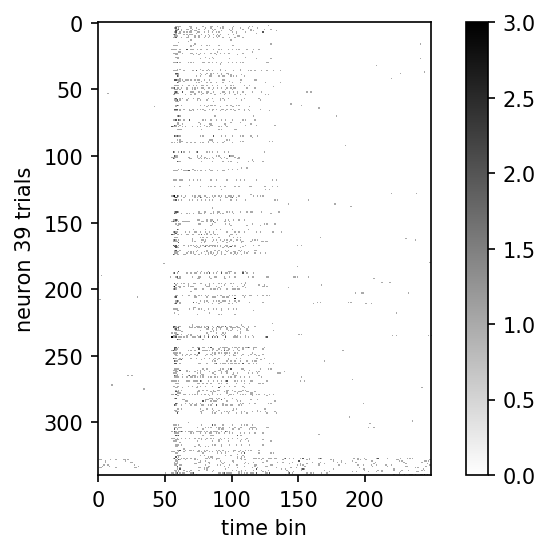

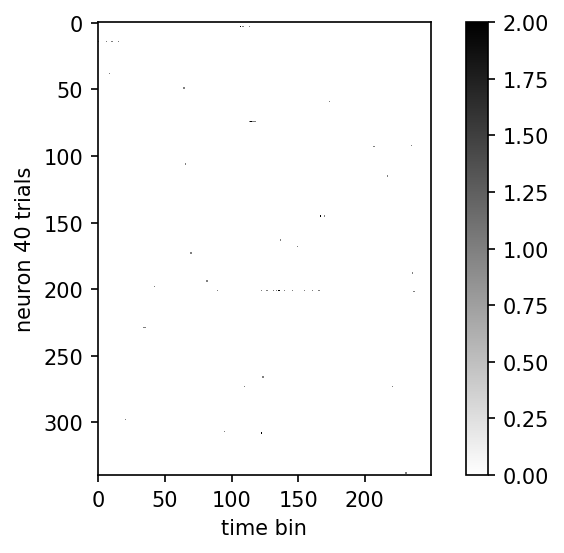

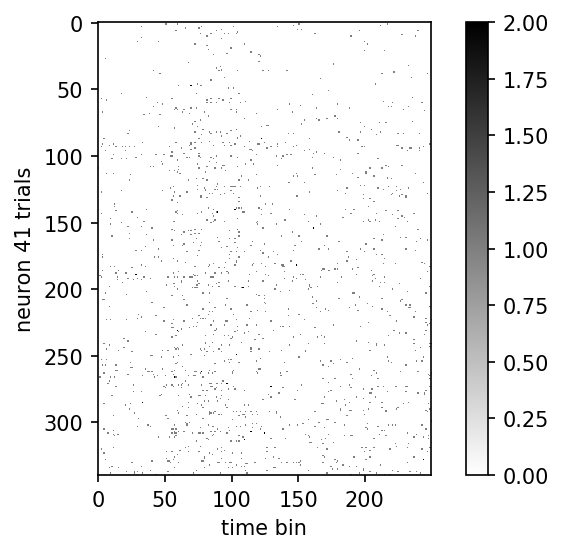

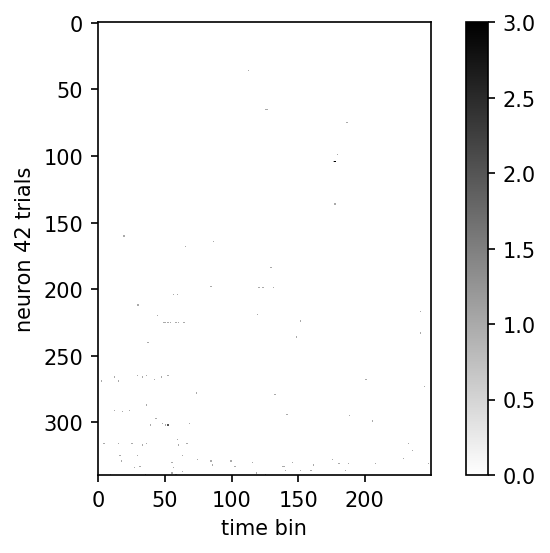

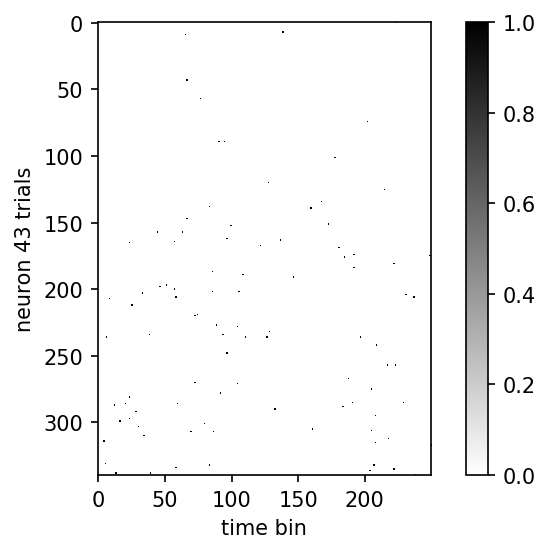

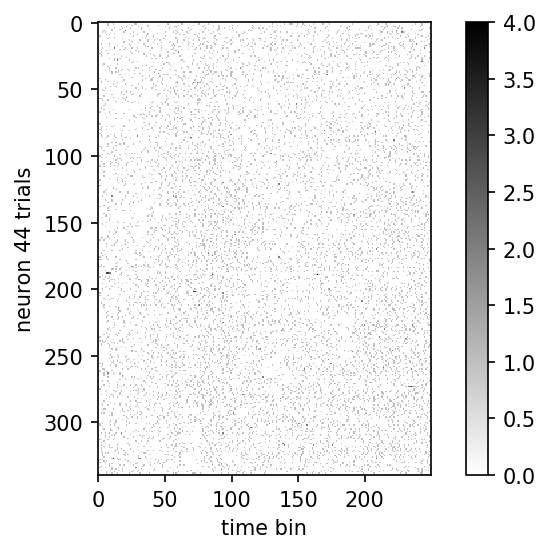

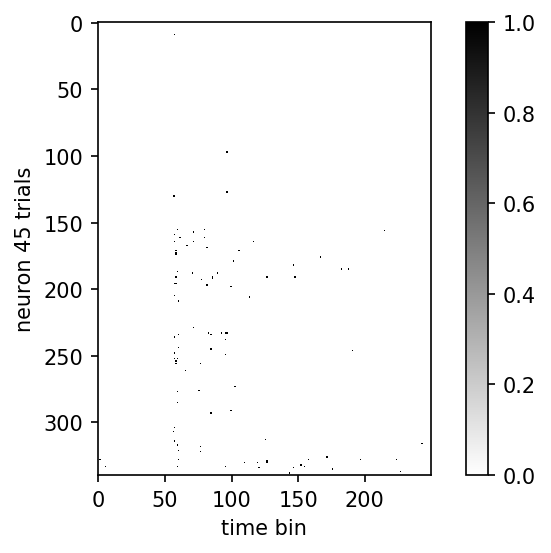

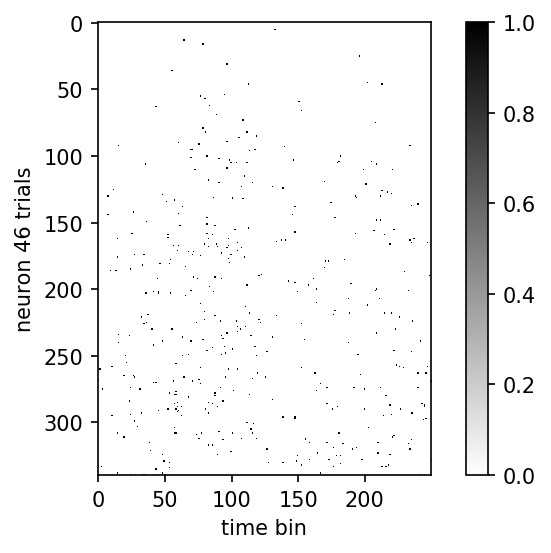

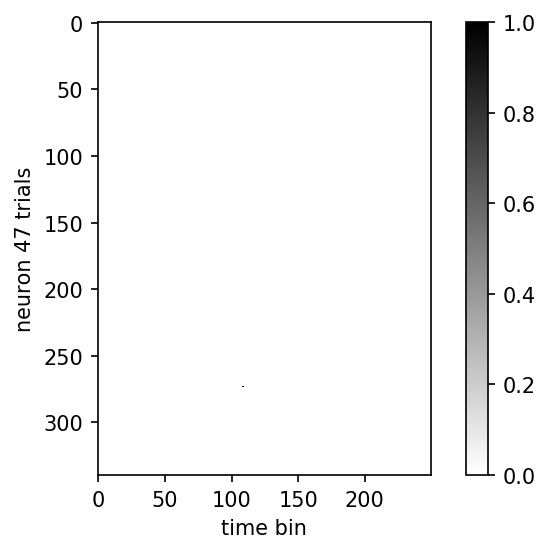

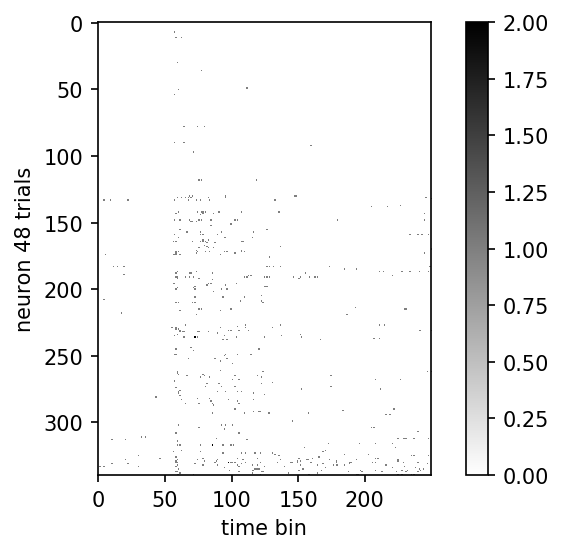

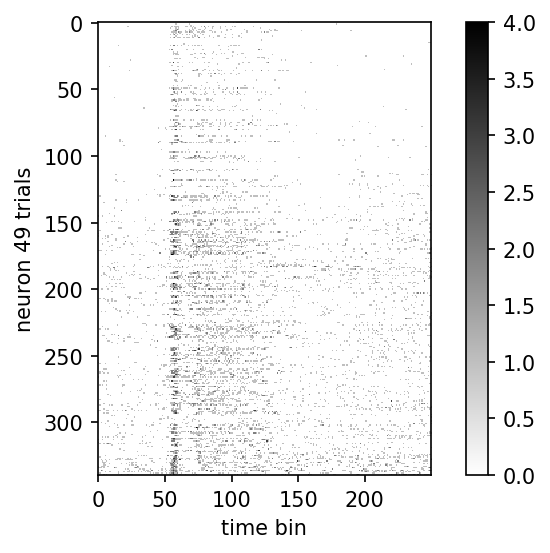

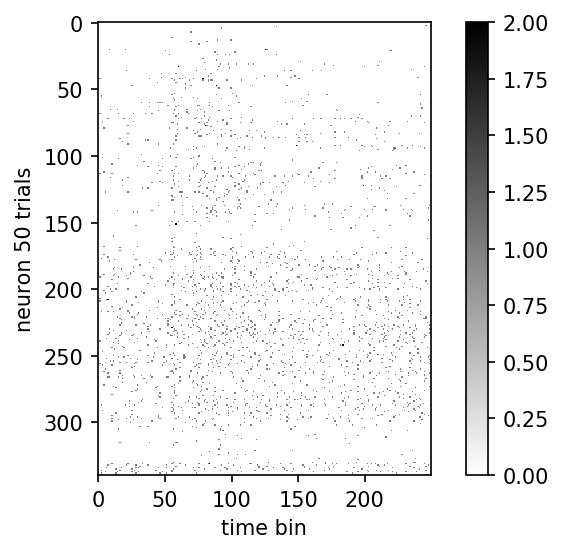

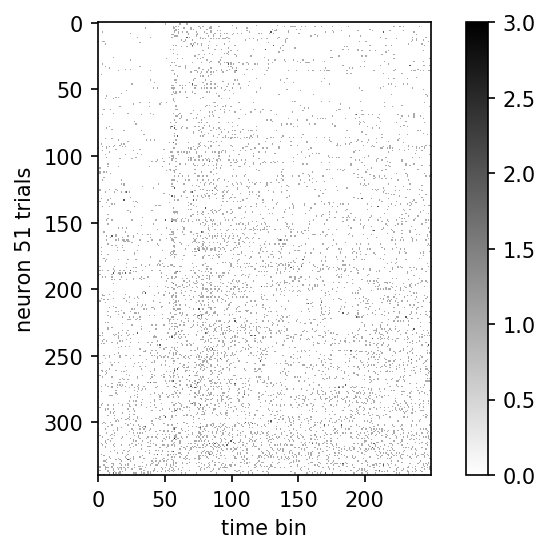

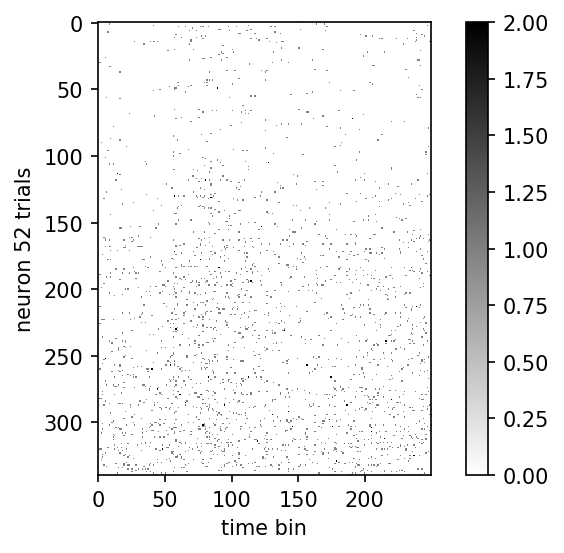

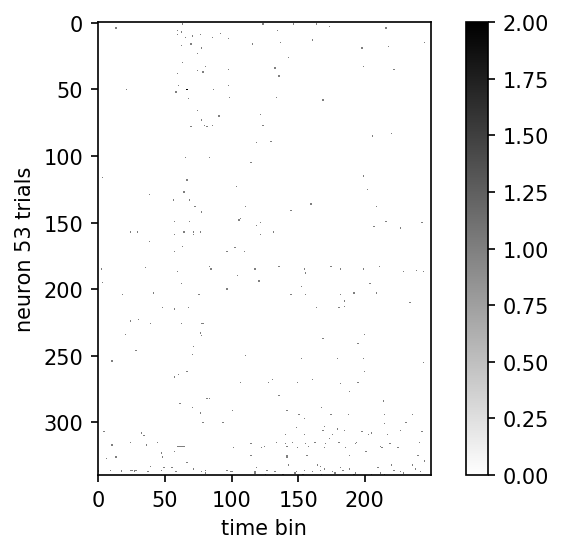

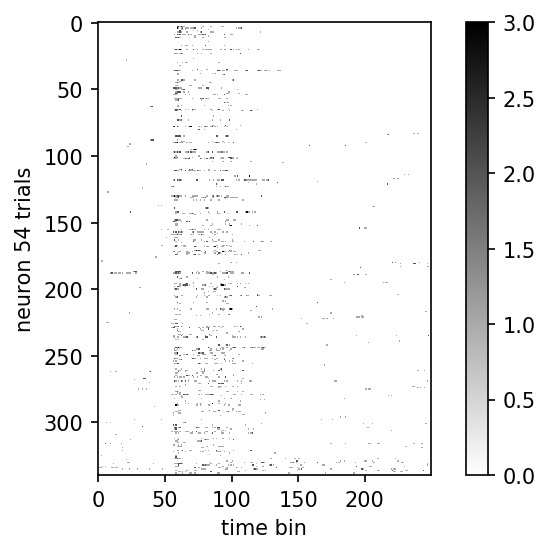

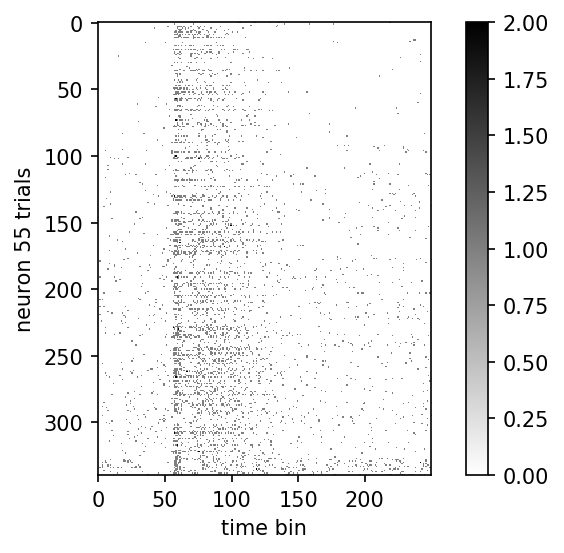

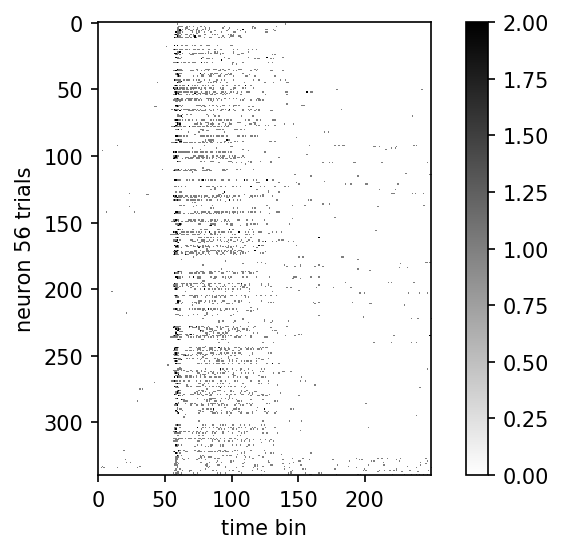

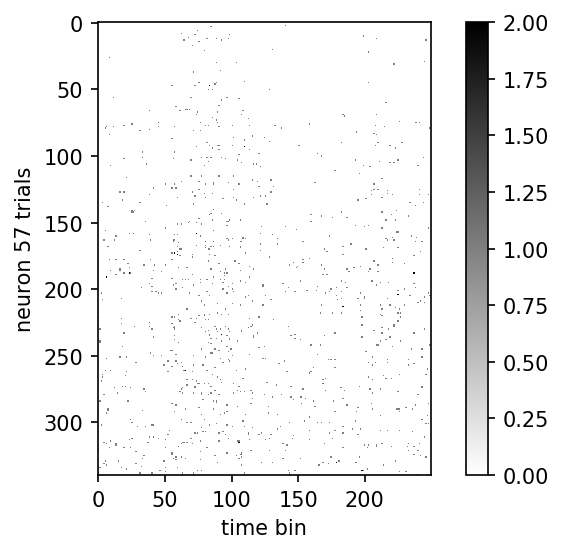

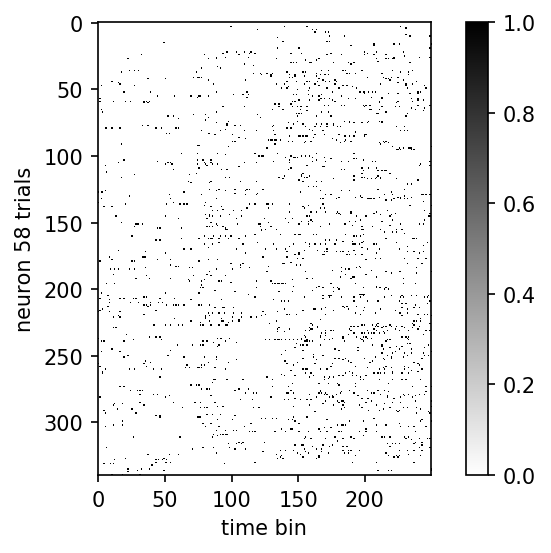

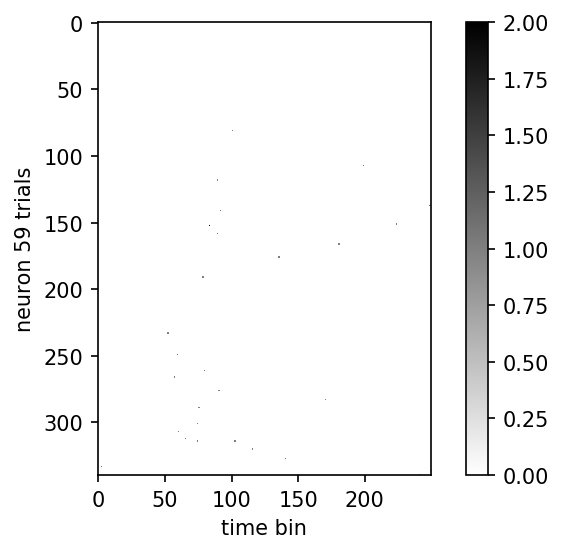

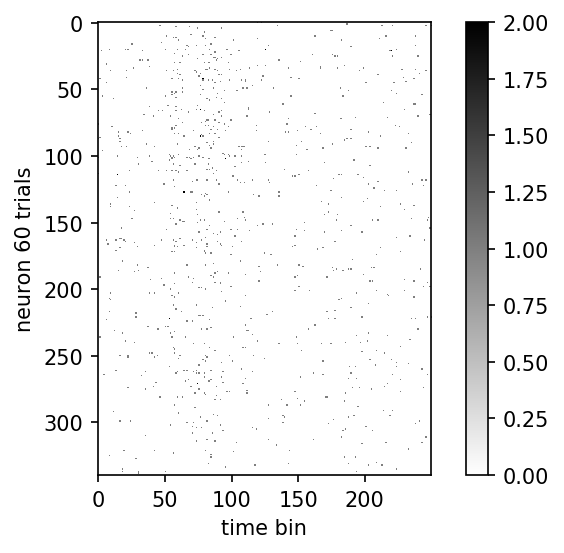

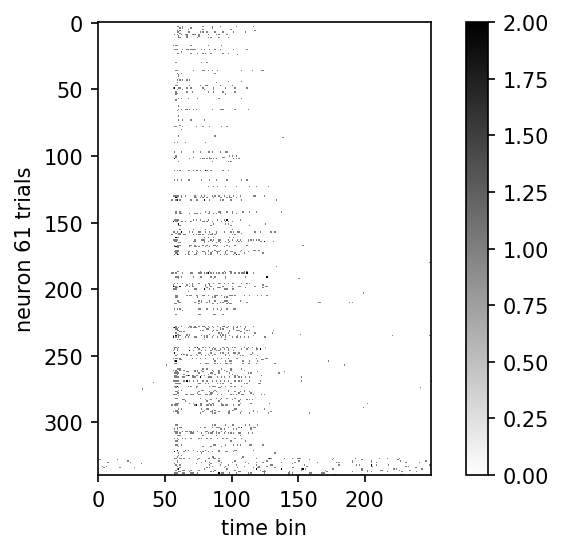

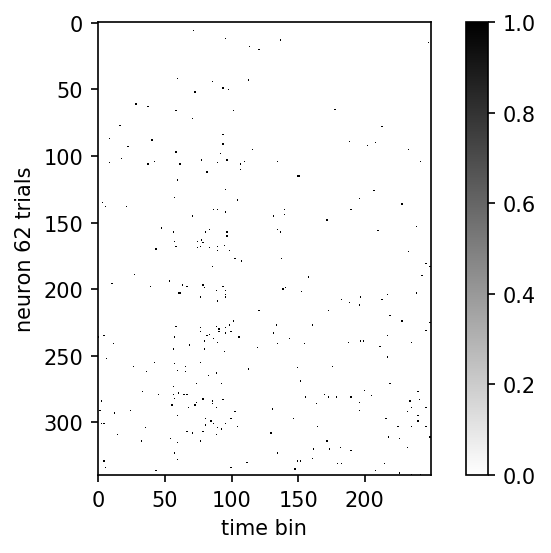

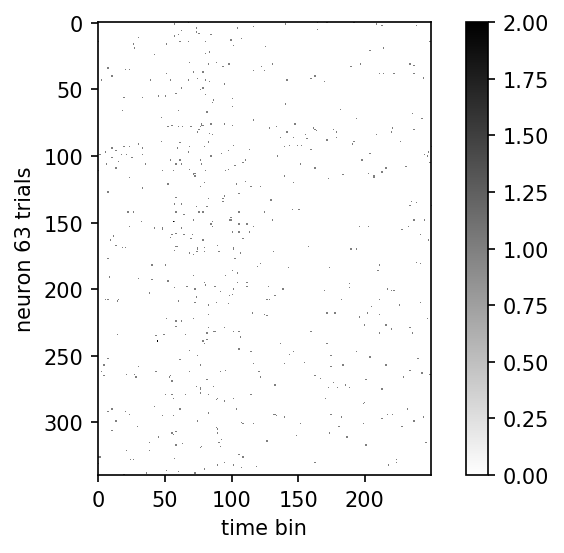

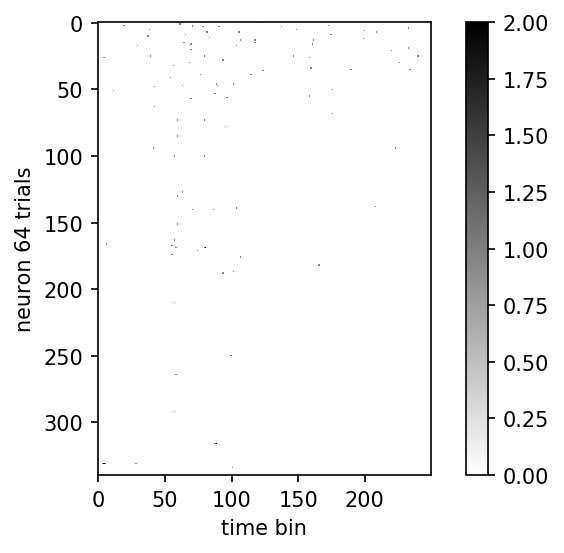

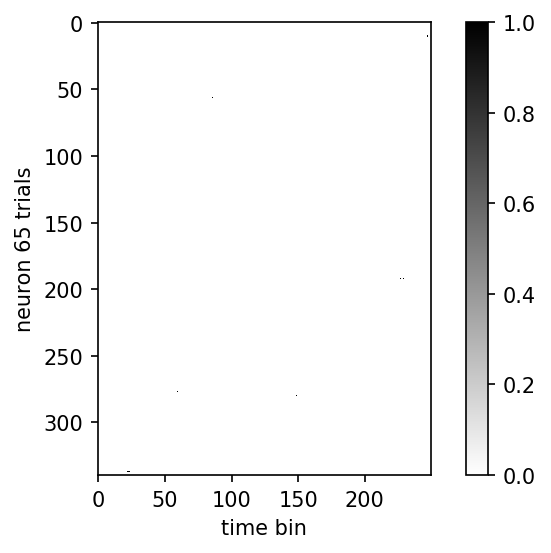

In [12]:
# plot spiking activity for each visp neuron across all trials
for neuron in range(visp_neurons_count):
    fig = plt.figure(dpi=150)
    plt.imshow(visp_neurons_spks[neuron], cmap='gray_r', alpha=1);
    plt.colorbar()
#     plt.imshow(visp_neurons_gocue[neuron], cmap='magma', alpha=0.25);
#     plt.imshow(visp_neurons_responses[neuron], cmap='magma', alpha=0.25);
    plt.xlabel("time bin")
    plt.ylabel(f"neuron {neuron} trials")
    plt.show()

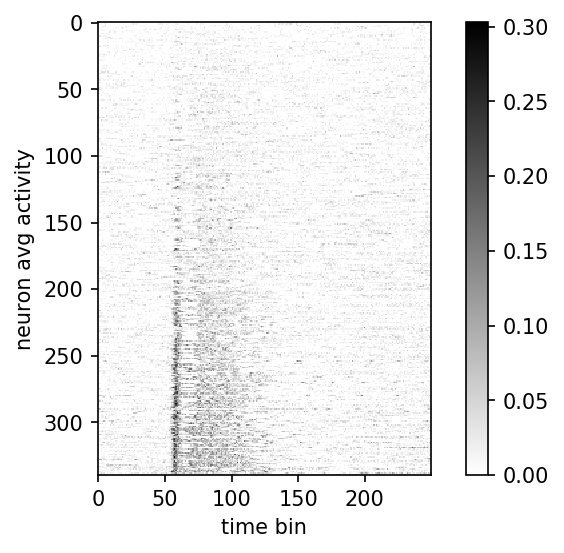

In [51]:
# plot average activity across all trials for each neuron
avg_activity = np.mean(visp_neurons_spks, axis=0)
total_act = np.sum(avg_activity, axis=1)

# sort by total activity
avg_acitivity_sorted = [x for _,x in sorted(zip(total_act,np.arange(0,avg_activity.shape[0])))]

fig = plt.figure(dpi=150)
plt.imshow(avg_activity[avg_acitivity_sorted], cmap='gray_r', alpha=1);
plt.colorbar()
plt.xlabel("time bin")
plt.ylabel(f"neuron avg activity")
plt.show()